<a href="https://colab.research.google.com/github/prasadashu/Machine_Learning_Experiments/blob/master/Effect_of_increasing_degrees_in_model_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X, y = make_regression(n_samples = 10, n_features = 1, noise = 20)

X = X.reshape(X.shape[0],)

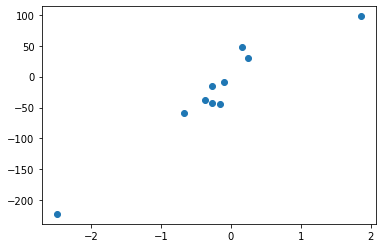

In [ ]:
plt.scatter(X, y)

## Repeat the below while changing the degree of the polynomial fit

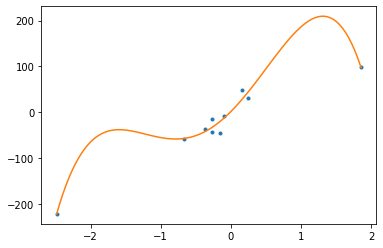

In [ ]:
degree = 4

z = np.polyfit(X, y, degree)

p = np.poly1d(z)

xp = np.linspace(X.min(), X.max(), 100)

plt.plot(X, y, '.', xp, p(xp), '-')
plt.show()

## Investigating the penalizing factor "alpha" in a non-linear model 

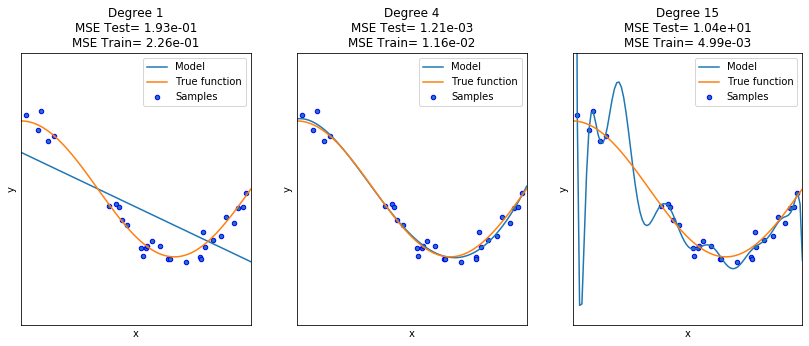

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1      #np.random.randn to introduce noise in dataset

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    # Creating 3 plots
    ax = plt.subplot(1, len(degrees), i + 1)
    
    # Sets properties of 'ax', setting property to hide scale of axises
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    
    pipeline.fit(X[:, np.newaxis], y)
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE Test= {:.2e}\nMSE Train= {:.2e}".format(
        degrees[i], mean_squared_error(true_fun(X_test), pipeline.predict(X_test[:, np.newaxis])), mean_squared_error(y, pipeline.predict(X[:, np.newaxis]))))
    
plt.show()

Introducing penalizing factor "alpha"

/home/ashu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.48325e-18): result may not be accurate.
  overwrite_a=True).T


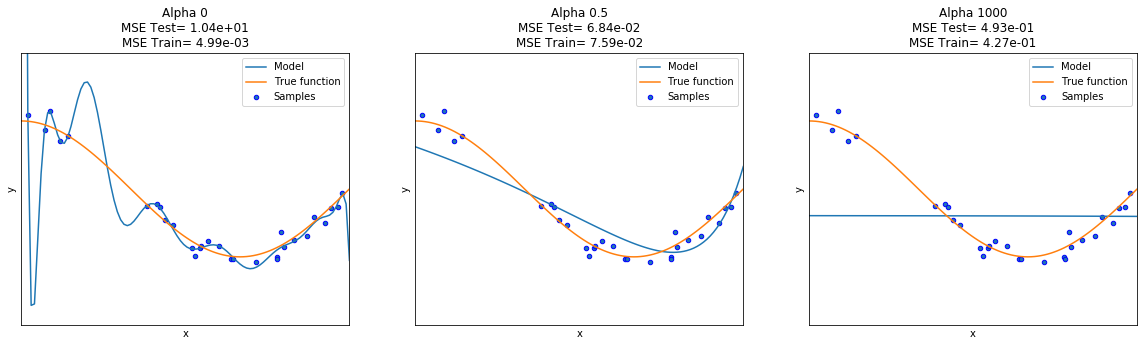

In [ ]:
from sklearn.linear_model import Ridge

alpha_list = [0, 0.5, 1000]

plt.figure(figsize=(20, 5))

for i in range(len(alpha_list)):
    # Creating 3 plots
    ax = plt.subplot(1, len(degrees), i + 1)

    # Sets properties of 'ax', setting property to hide scale of axises
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    ridge_regression = Ridge(alpha = alpha_list[i])

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", ridge_regression)])

    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Alpha {}\nMSE Test= {:.2e}\nMSE Train= {:.2e}".format(
        alpha_list[i], mean_squared_error(true_fun(X_test), pipeline.predict(X_test[:, np.newaxis])), mean_squared_error(y, pipeline.predict(X[:, np.newaxis]))))
    
plt.show()

Implementing GridSearchCV to identify optimal value of "alpha"

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha' : np.linspace(0, 1, 100)} 

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
ridge_regression = Ridge(alpha = 0)

grid_ridge_regression = GridSearchCV(ridge_regression, parameters, scoring = 'neg_mean_squared_error', cv = 10)

pipeline = Pipeline([('polynomial_feature', polynomial_features),
                    ('ridge_cross_validation', grid_ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)

pipeline['ridge_cross_validation'].best_estimator_

/home/ashu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.48325e-18): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.020202020202020204, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

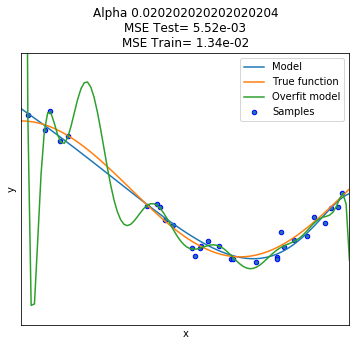

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha' : np.linspace(0, 1, 100)} 

plt.figure(figsize=(20, 5))

# Creating 3 plots
ax = plt.subplot(1, len(degrees), i + 1)

# Sets properties of 'ax', setting property to hide scale of axises
plt.setp(ax, xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
ridge_regression = Ridge(alpha = 0)

optimal_ridge_regression = Ridge(alpha=0.020202020202020204, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

overfit_model = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", ridge_regression)])

pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", optimal_ridge_regression)])

pipeline.fit(X[:, np.newaxis], y)
overfit_model.fit(X[:, np.newaxis], y)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.plot(X_test, overfit_model.predict(X_test[:, np.newaxis]), label="Overfit model")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Alpha {}\nMSE Test= {:.2e}\nMSE Train= {:.2e}".format(
    grid_ridge_regression.best_params_['alpha'], mean_squared_error(true_fun(X_test), pipeline.predict(X_test[:, np.newaxis])), mean_squared_error(y, pipeline.predict(X[:, np.newaxis]))))

plt.show()